In [27]:
import numpy as np
import  matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LinearSegmentedColormap

In [28]:
ds=xr.open_dataset("./gocart.inst_aod.20231001_0300z.nc4")

In [29]:
ds.data_vars

Data variables:
    AOD      (time, lev, lat, lon) float32 4MB ...
    AOD_BC   (time, lev, lat, lon) float32 4MB ...
    AOD_DU   (time, lev, lat, lon) float32 4MB ...
    AOD_OC   (time, lev, lat, lon) float32 4MB ...
    AOD_SS   (time, lev, lat, lon) float32 4MB ...
    AOD_SU   (time, lev, lat, lon) float32 4MB ...

In [30]:
print(ds['AOD'])

<xarray.DataArray 'AOD' (time: 1, lev: 4, lat: 361, lon: 720)> Size: 4MB
[1039680 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 6kB -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
  * lat      (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float64 32B 1.0 2.0 3.0 4.0
  * time     (time) datetime64[ns] 8B 2023-10-01T03:00:00
Attributes:
    fmissing_value:  1000000000000000.0
    long_name:       Total Aerosol Extinction AOT [550 nm]
    regrid_method:   bilinear
    standard_name:   Total Aerosol Extinction AOT [550 nm]
    units:           1
    valid_range:     [-1.e+15  1.e+15]
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0


In [31]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Define the color sequence
colors = [
    "white",       # 0
    "purple",      # 1
    "lightblue",   # 2
    "green",       # 3
    "yellow",      # 4
    "orange",      # 5
    "red",         # 6
    "purple"       # 7 - repeating to close loop or intensify
]

# Create a ListedColormap
#cmap = ListedColormap(colors)
# Create a smooth custom colormap from the list
cmap = LinearSegmentedColormap.from_list("custom_colormap", colors, N=1024)


# Create a dummy image with values from 0 to 1
gradient = np.linspace(0, 1, 256).reshape(1, -1)

# Plot the colorbar
#fig, ax = plt.subplots(figsize=(8, 1))
#fig.subplots_adjust(bottom=0.5)

#cb = ax.imshow(gradient, aspect='auto', cmap=cmap)
#ax.set_axis_off()

# Add colorbar
#cbar = fig.colorbar(cb, orientation='horizontal', ax=ax, ticks=np.linspace(0, 1, len(colors)))
#cbar.ax.set_xticklabels([
#    'white', 'purple', 'lightblue', 'green', 'yellow', 'orange', 'red', 'purple'
#])

#plt.show()

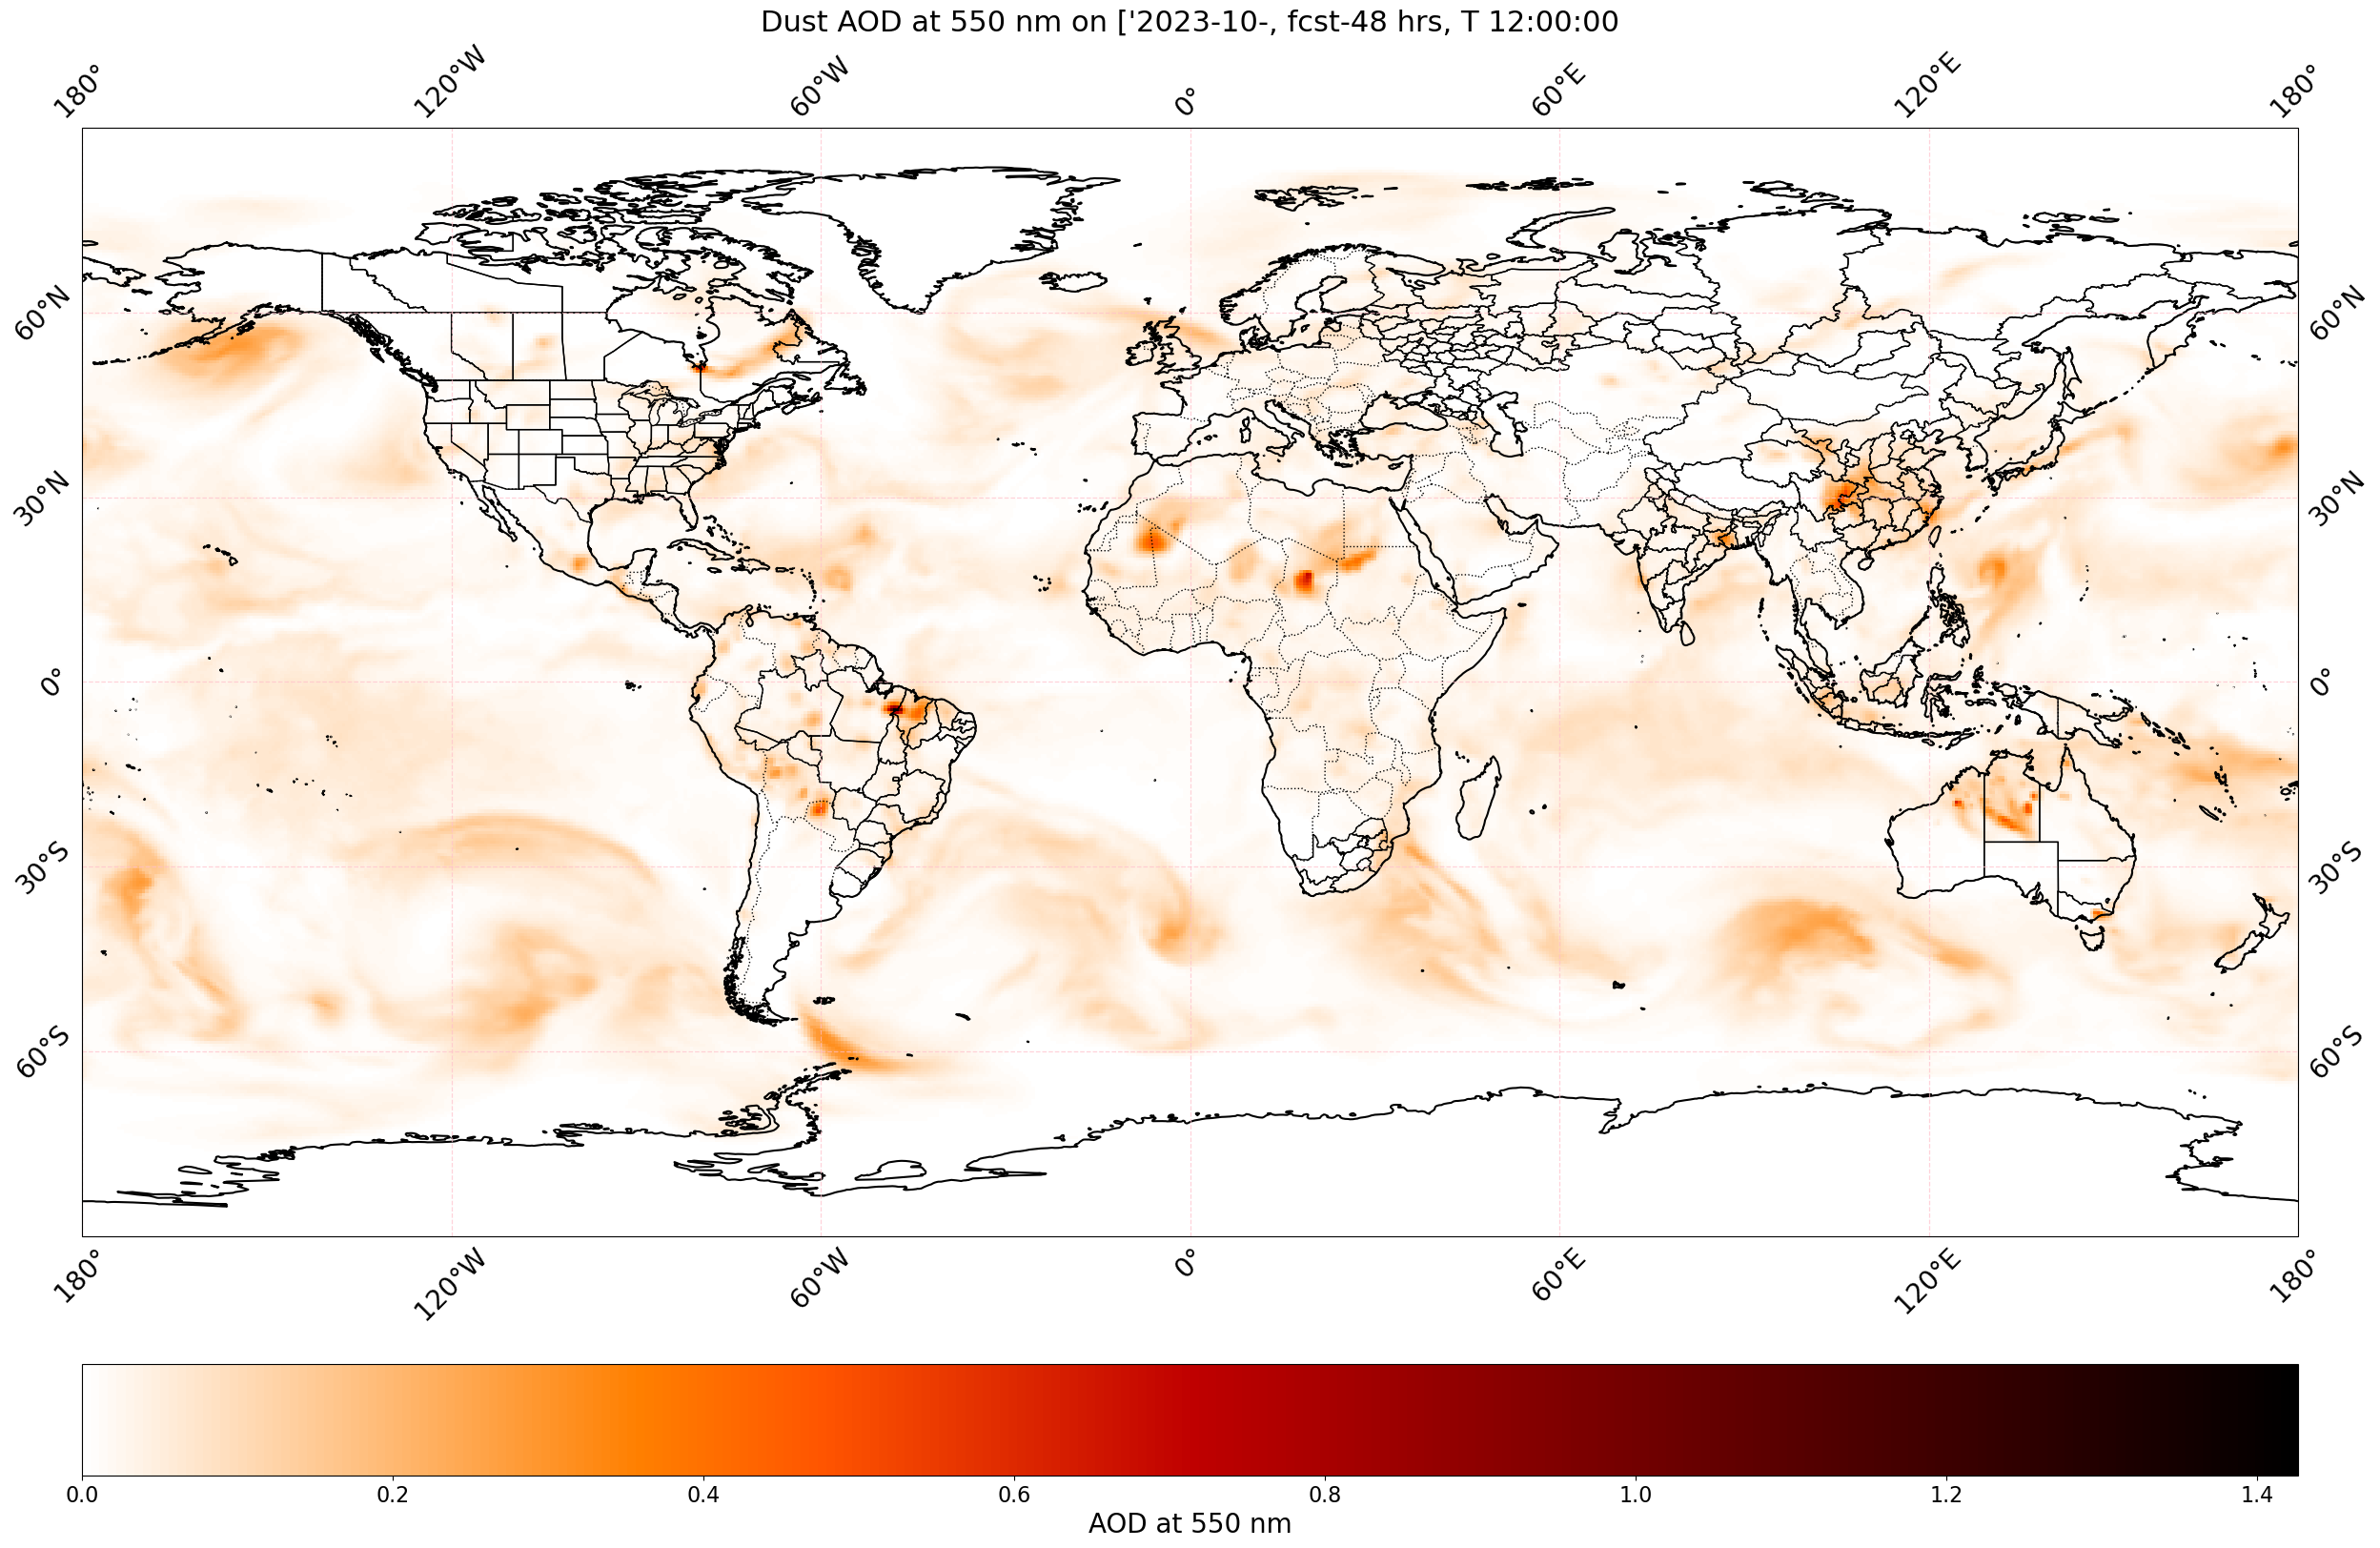

In [35]:
# Extract and prepare AOD data
AOD = sum(ds)
aod = ds["AOD"].isel(lev=0)
lon, lat = np.meshgrid(aod.lon, aod.lat)
a = aod.values

# Define projections
map_crs = ccrs.PlateCarree()
data_crs = ccrs.PlateCarree()

# Create figure and axis
fig = plt.figure(figsize=(30, 25))
ax = plt.subplot(1, 1, 1, projection=map_crs)

# Add features
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=1.5)
ax.add_feature(cfeature.STATES.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.OCEAN, facecolor="lightblue")

# Title
plt.title(f"Dust AOD at 550 nm on {str(aod.time.values)[:10]}, fcst-48 hrs, T 12:00:00", fontsize=22)

# Gridlines
gridlines = ax.gridlines(draw_labels=True, crs=data_crs, linewidth=0.9, x_inline=False, y_inline=False, color="pink", alpha=0.7, linestyle="--")
gridlines.xlabels_top = True
gridlines.ylabels_right = False
gridlines.xlabel_style = {"size": 20, "color": "black", "rotation": 45}
gridlines.ylabel_style = {"size": 20, "color": "black", "rotation": 45}

# Contourf plot of AOD
mesh = ax.pcolormesh(lon, lat, a.squeeze(), transform=data_crs, cmap='gist_heat_r', shading='auto')

# Colorbar
cbar = plt.colorbar(mesh, ax=ax, pad=0.07, orientation="horizontal")
cbar.set_label("AOD at 550 nm", fontsize=20)
cbar.ax.tick_params(labelsize=16)
#plt.savefig("./dAOD48.png")
plt.show()